In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load each sheet into a separate DataFrame
df_kenya = pd.read_excel("Eth_Ken_Data.xlsx", sheet_name="KENYA")
df_ethiopia = pd.read_excel("Eth_Ken_Data.xlsx", sheet_name="ETHIOPIA")

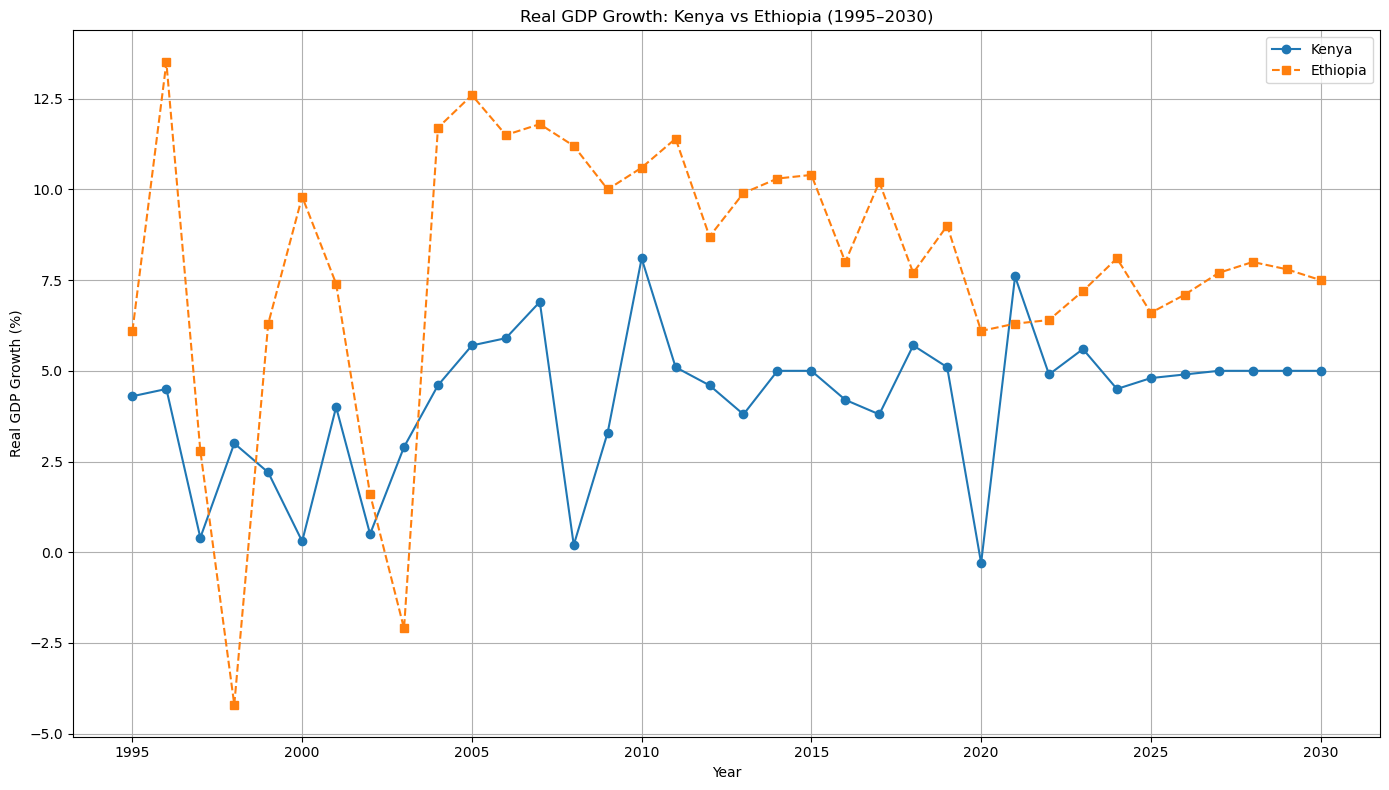

In [8]:
#LINE GRAPH
Real_GDP = 'Real GDP growth (Annual percent change)'
Year = 'year'

plt.figure(figsize=(14, 8))

plt.plot(df_kenya[Year], df_kenya[Real_GDP], marker='o', linestyle='-', label='Kenya')
plt.plot(df_ethiopia[Year], df_ethiopia[Real_GDP], marker='s', linestyle='--', label='Ethiopia')
plt.xlabel('Year')
plt.ylabel('Real GDP Growth (%)')
plt.title('Real GDP Growth: Kenya vs Ethiopia (1995–2030)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

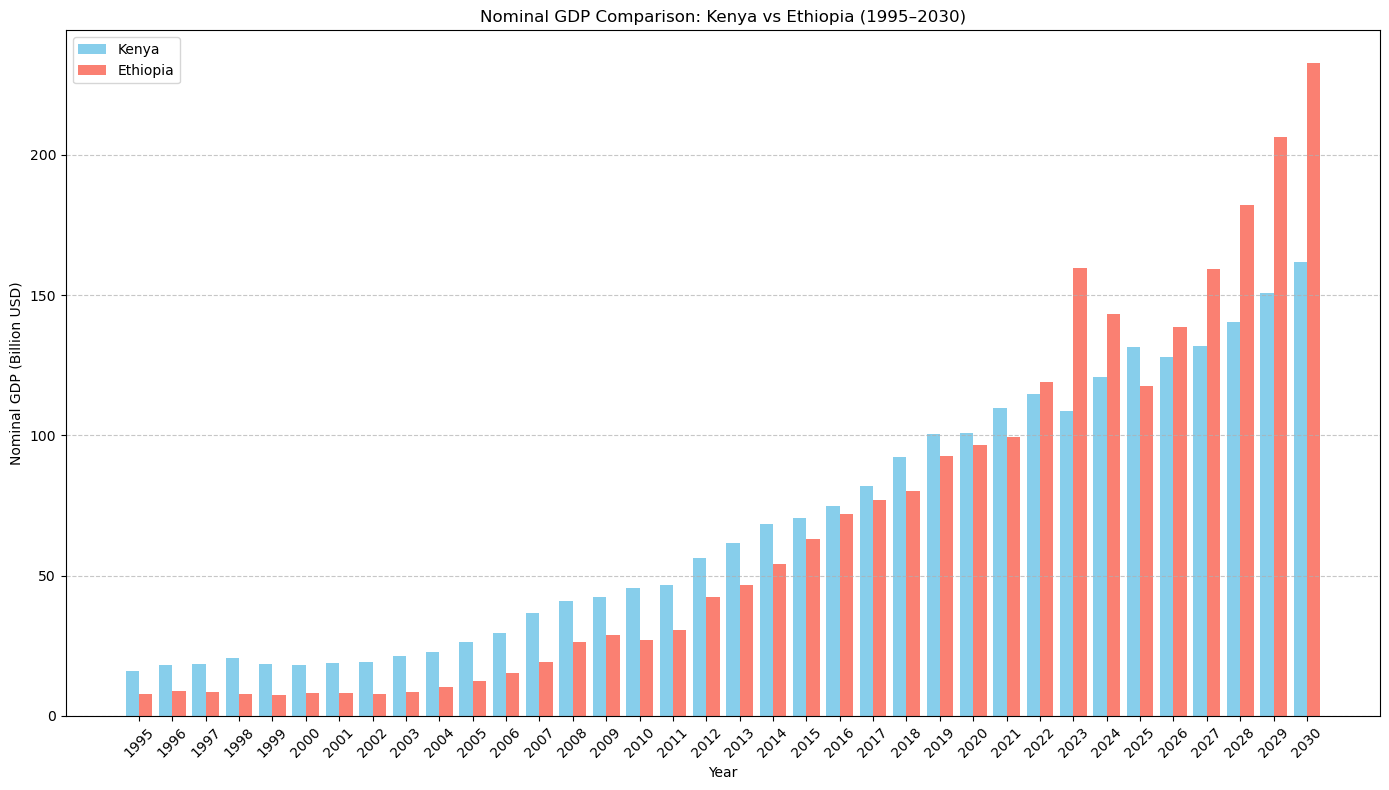

In [10]:
#BAR GRAPH

Nominal_GDP = 'GDP, current prices (Billions of U.S. dollars)'      # Column names

df_merged = pd.merge(df_kenya[[Year, Nominal_GDP]],df_ethiopia[[Year, Nominal_GDP]],on=Year,suffixes=('_Kenya', '_Ethiopia'))

years = df_merged[Year]
kenya_gdp = df_merged[Nominal_GDP + '_Kenya']
ethiopia_gdp = df_merged[Nominal_GDP + '_Ethiopia']

x = np.arange(len(years))
bar_width = 0.4

plt.figure(figsize=(14, 8))
plt.bar(x - bar_width/2, kenya_gdp, width=bar_width, label='Kenya', color='skyblue')
plt.bar(x + bar_width/2, ethiopia_gdp, width=bar_width, label='Ethiopia', color='salmon')

plt.xlabel('Year')
plt.ylabel('Nominal GDP (Billion USD)')
plt.title('Nominal GDP Comparison: Kenya vs Ethiopia (1995–2030)')
plt.xticks(x, years, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

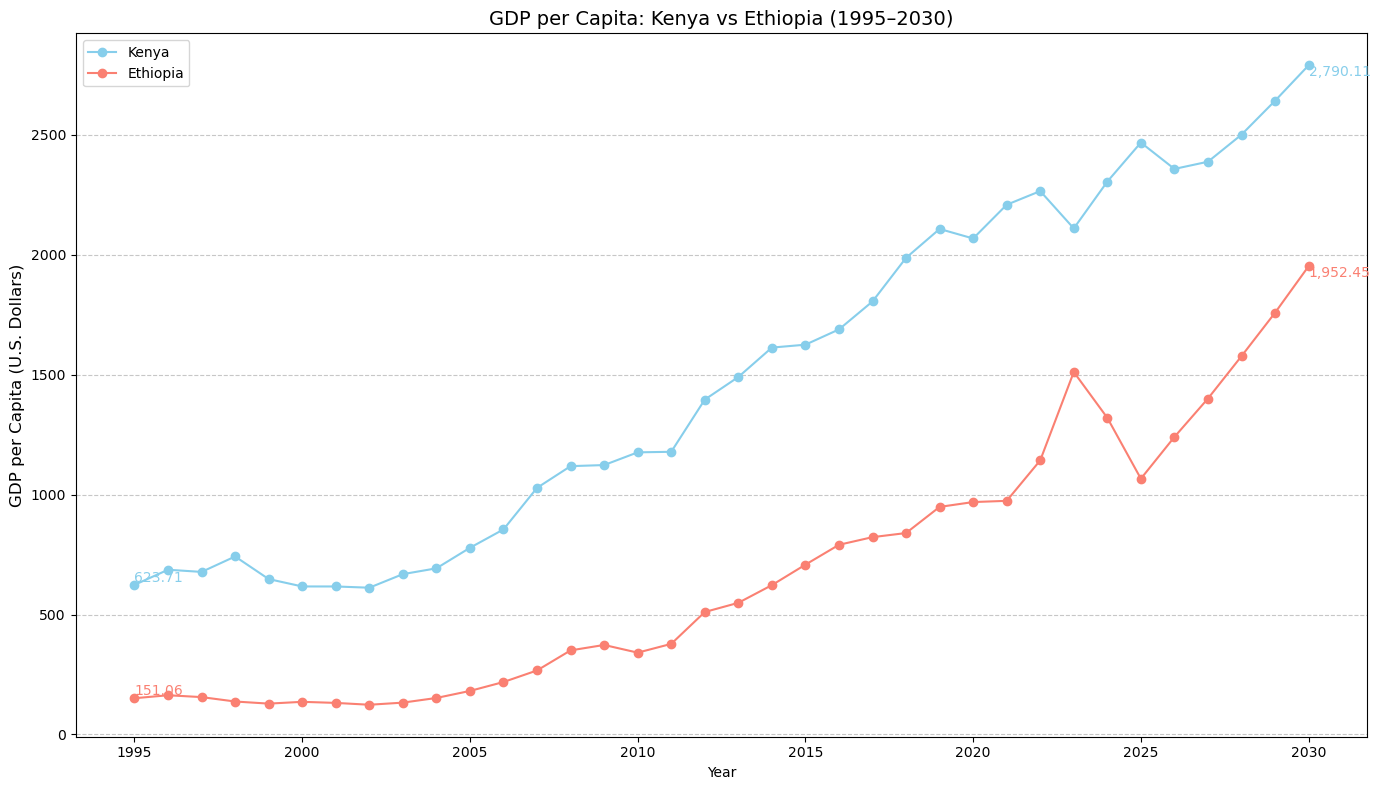

In [12]:
#SLOPE CHART

GDP_per_capita = 'GDP per capita, current prices\n (U.S. dollars per capita)'

df_merged = pd.merge(df_kenya[[Year, GDP_per_capita]],df_ethiopia[[Year, GDP_per_capita]],on=Year,suffixes=('_Kenya', '_Ethiopia'))

years = df_merged[Year]
kenya_gdp_per_capita = df_merged[GDP_per_capita + '_Kenya']
ethiopia_gdp_per_capita = df_merged[GDP_per_capita + '_Ethiopia']

plt.figure(figsize=(14, 8))
plt.plot(years, kenya_gdp_per_capita, label='Kenya', color='skyblue', marker='o')
plt.plot(years, ethiopia_gdp_per_capita, label='Ethiopia', color='salmon', marker='o')

plt.text(years.iloc[0], kenya_gdp_per_capita.iloc[0], f'{kenya_gdp_per_capita.iloc[0]:,.2f}', color='skyblue', fontsize=10, verticalalignment='bottom')
plt.text(years.iloc[0], ethiopia_gdp_per_capita.iloc[0], f'{ethiopia_gdp_per_capita.iloc[0]:,.2f}', color='salmon', fontsize=10, verticalalignment='bottom')
plt.text(years.iloc[-1], kenya_gdp_per_capita.iloc[-1], f'{kenya_gdp_per_capita.iloc[-1]:,.2f}', color='skyblue', fontsize=10, verticalalignment='top')
plt.text(years.iloc[-1], ethiopia_gdp_per_capita.iloc[-1], f'{ethiopia_gdp_per_capita.iloc[-1]:,.2f}', color='salmon', fontsize=10, verticalalignment='top')
plt.title('GDP per Capita: Kenya vs Ethiopia (1995–2030)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('GDP per Capita (U.S. Dollars)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

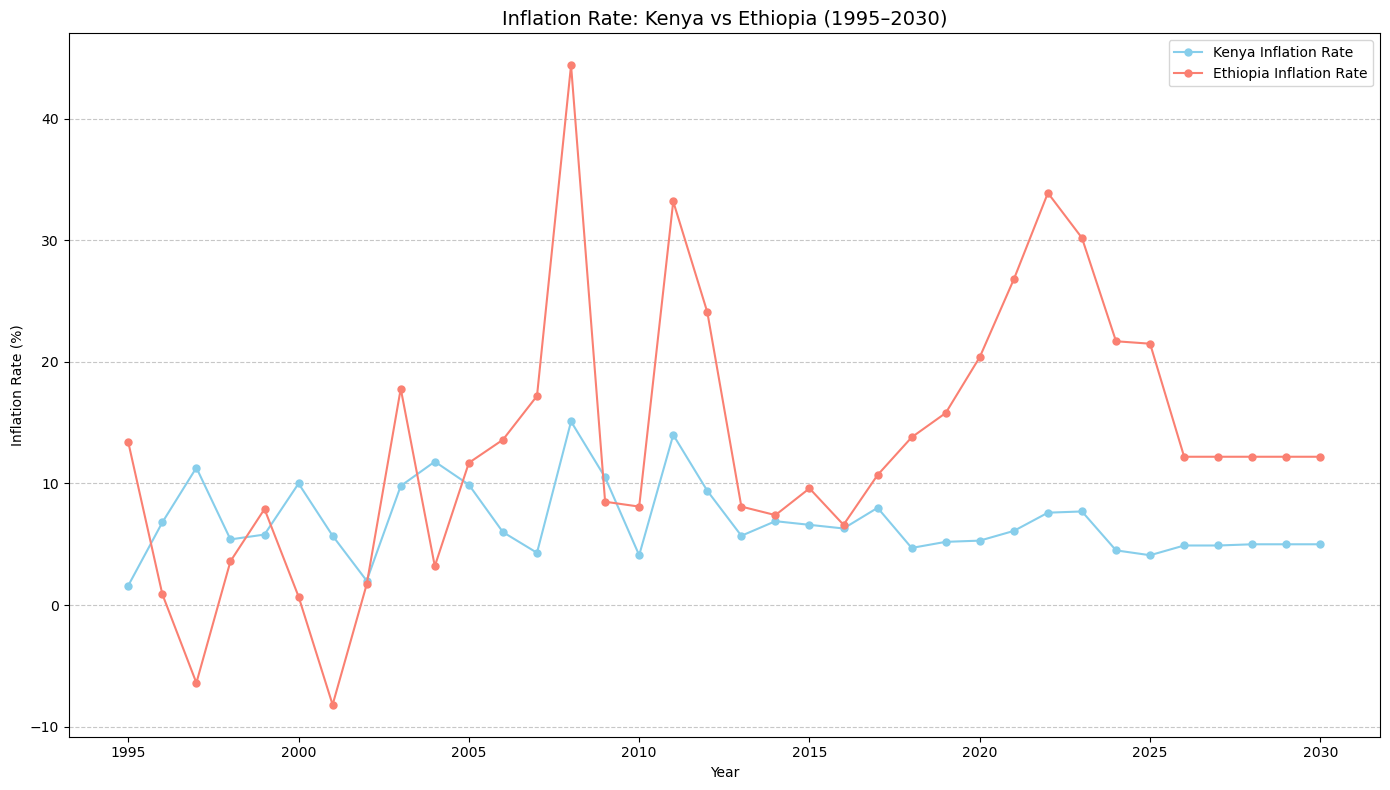

In [14]:
#DUAL LINE CHART

Inflation_rate = 'Inflation rate, average consumer prices (Annual percent change)'

df_merged = pd.merge(df_kenya[[Year, Inflation_rate]],df_ethiopia[[Year, Inflation_rate]],on=Year,suffixes=('_Kenya', '_Ethiopia'))

years = df_merged[Year]
kenya_inflation = df_merged[Inflation_rate + '_Kenya']
ethiopia_inflation = df_merged[Inflation_rate + '_Ethiopia']

plt.figure(figsize=(14, 8))
plt.plot(years, kenya_inflation, label='Kenya Inflation Rate', color='skyblue', marker='o', linestyle='-', markersize=5)
plt.plot(years, ethiopia_inflation, label='Ethiopia Inflation Rate', color='salmon', marker='o', linestyle='-', markersize=5)
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.title('Inflation Rate: Kenya vs Ethiopia (1995–2030)', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

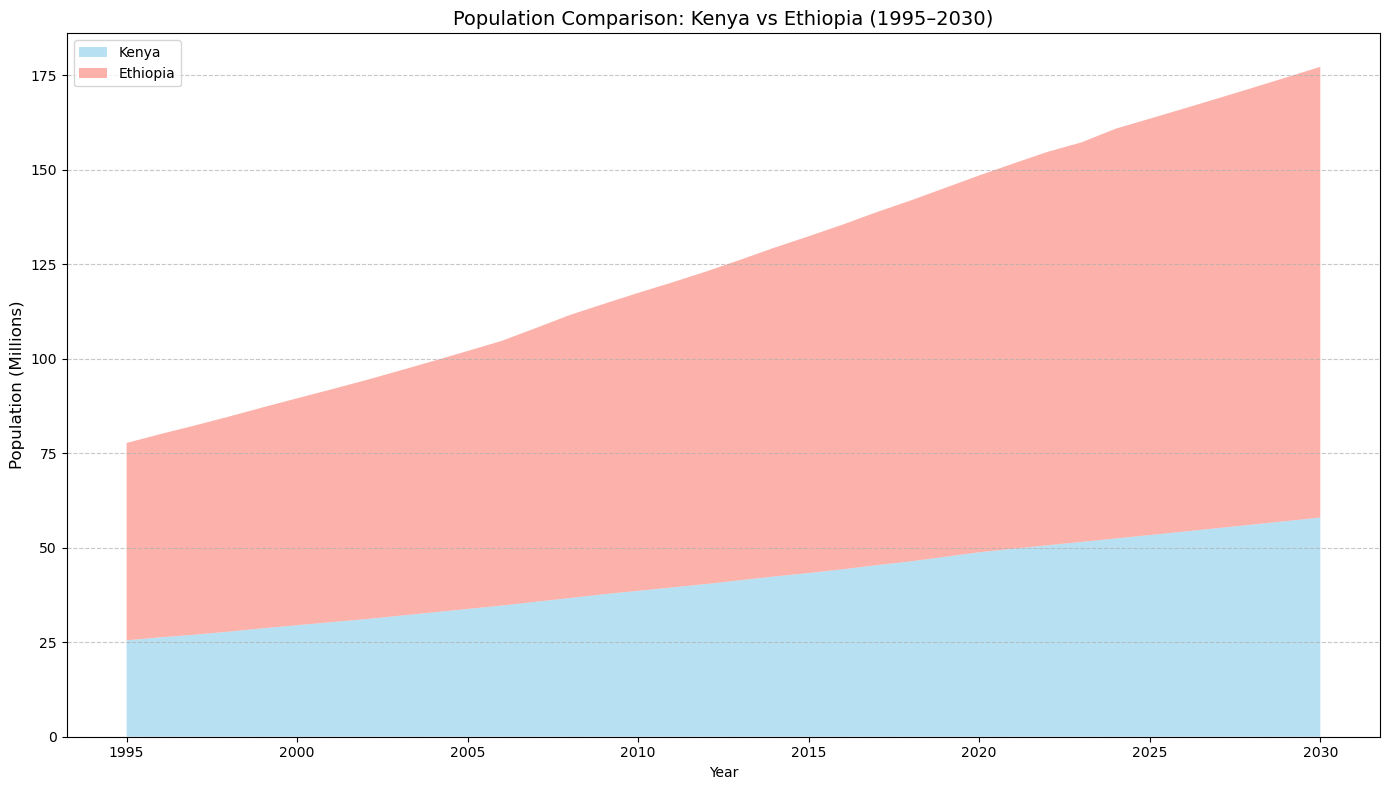

In [16]:
Population = 'Population (Millions of people)'

df_merged = pd.merge(df_kenya[[Year, Population]],df_ethiopia[[Year, Population]],on=Year,suffixes=('_Kenya', '_Ethiopia'))

years = df_merged[Year]
kenya_population = df_merged[Population + '_Kenya']
ethiopia_population = df_merged[Population + '_Ethiopia']

plt.figure(figsize=(14, 8))
plt.stackplot(years, kenya_population, ethiopia_population, labels=['Kenya', 'Ethiopia'], alpha=0.6, colors=['skyblue', 'salmon'])

plt.title('Population Comparison: Kenya vs Ethiopia (1995–2030)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Population (Millions)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

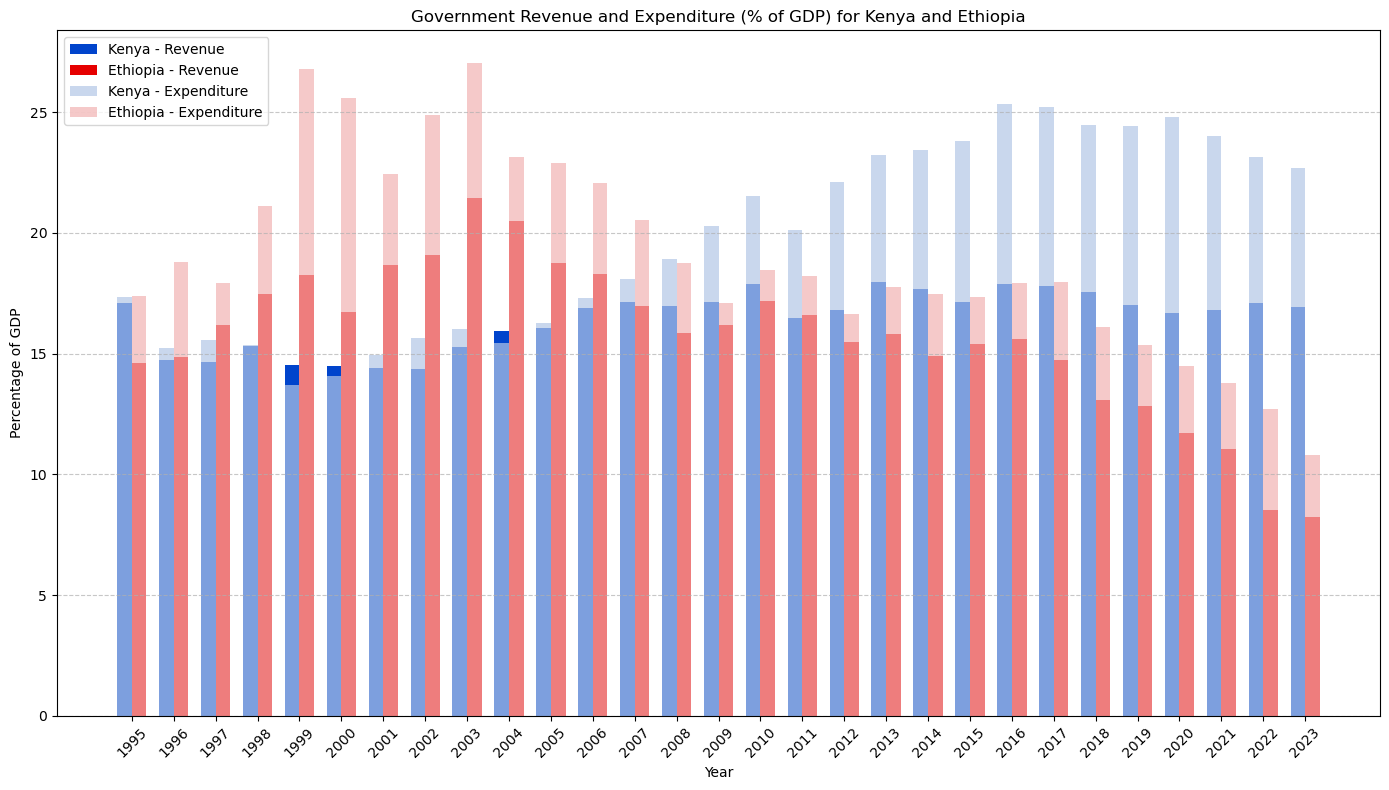

In [84]:
#SIDE BY SIDE BAR CHART
gov_rev = 'Government revenue, percent of GDP (% of GDP)'
gov_exp = 'Government expenditure, percent of GDP (% of GDP)'

df_kenya_filtered = df_kenya[(df_kenya[Year] >= 1995) & (df_kenya[Year] <= 2023)]
df_ethiopia_filtered = df_ethiopia[(df_ethiopia[Year] >= 1995) & (df_ethiopia[Year] <= 2023)]

df_merg_rev = pd.merge(df_kenya_filtered[[Year, gov_rev]], df_ethiopia_filtered[[Year, gov_rev]], on=Year, suffixes=('_Kenya', '_Ethiopia'))
df_merg_exp = pd.merge(df_kenya_filtered[[Year, gov_exp]], df_ethiopia_filtered[[Year, gov_exp]], on=Year, suffixes=('_Kenya', '_Ethiopia'))

years = df_merg_rev[Year]
kenya_gov_rev = df_merg_rev[gov_rev + '_Kenya']
kenya_gov_exp = df_merg_exp[gov_exp + '_Kenya']
ethiopia_gov_rev = df_merg_rev[gov_rev + '_Ethiopia']
ethiopia_gov_exp = df_merg_exp[gov_exp + '_Ethiopia']

bar_width = 0.35
x = np.arange(len(years))  # the label locations
plt.figure(figsize=(14, 8))

plt.bar(x - bar_width / 2, kenya_gov_rev, width=bar_width, label='Kenya - Revenue', color='#0044cc')  # Blue for Kenya Revenue
plt.bar(x + bar_width / 2, ethiopia_gov_rev, width=bar_width, label='Ethiopia - Revenue', color='#e60000')  # Orange for Ethiopia Revenue
plt.bar(x - bar_width / 2, kenya_gov_exp, width=bar_width, label='Kenya - Expenditure', color='#b3c7e6', alpha=0.7)  # Green for Kenya Expenditure
plt.bar(x + bar_width / 2, ethiopia_gov_exp, width=bar_width, label='Ethiopia - Expenditure', color='#f2b3b3', alpha=0.7)  # Red for Ethiopia Expenditure

plt.xlabel('Year')
plt.ylabel('Percentage of GDP')
plt.title('Government Revenue and Expenditure (% of GDP) for Kenya and Ethiopia')
plt.xticks(x, years, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

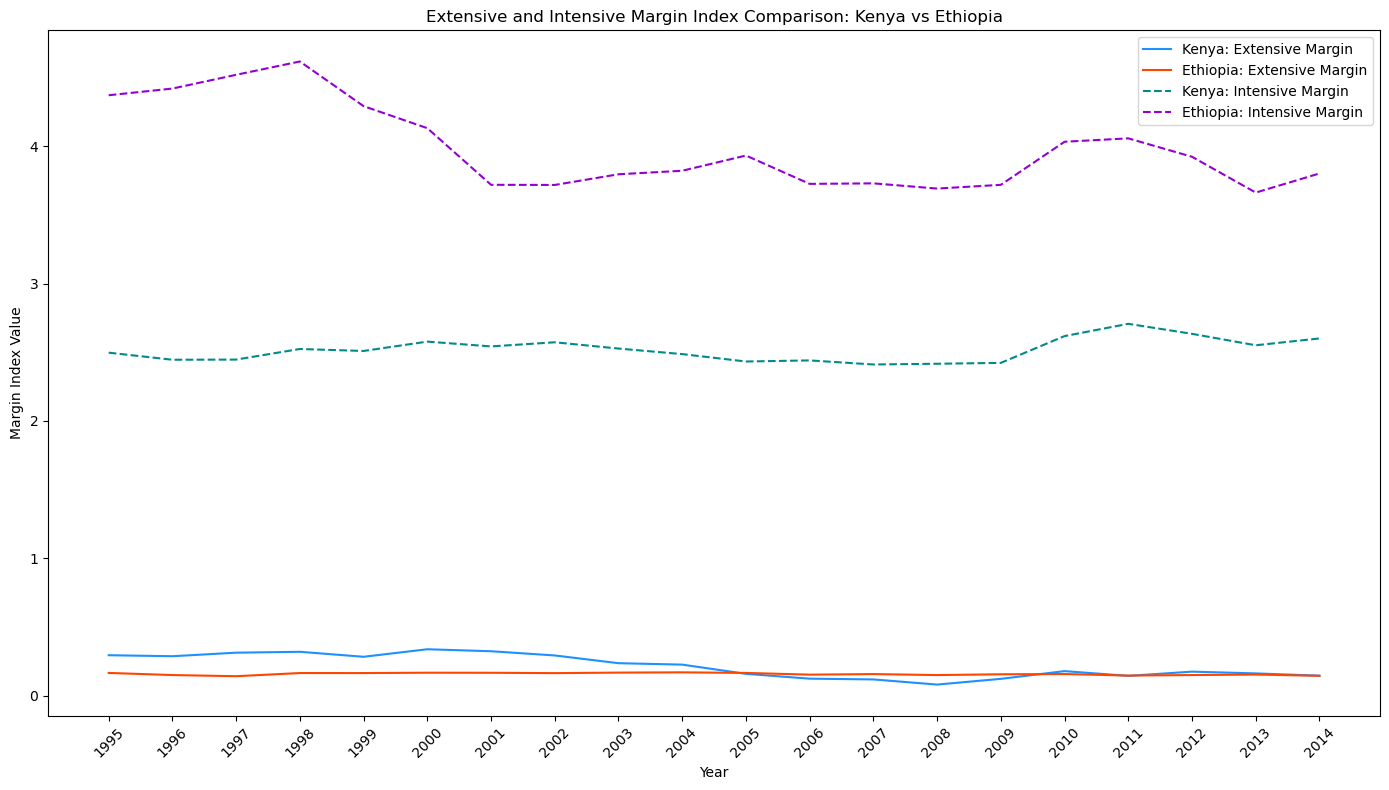

In [20]:
#LINE CHART

extensive_margin = 'Extensive Margin (Index)'
intensive_margin = 'Intensive Margin (Index)'

df_kenya_filtered = df_kenya[(df_kenya[Year] >= 1995) & (df_kenya[Year] <= 2014)]
df_ethiopia_filtered = df_ethiopia[(df_ethiopia[Year] >= 1995) & (df_ethiopia[Year] <= 2014)]

df_merged = pd.merge(df_kenya_filtered[[Year,extensive_margin,intensive_margin]],df_ethiopia_filtered[[Year,extensive_margin,intensive_margin]],on=Year,suffixes=('_Kenya', '_Ethiopia'))

plt.figure(figsize=(14, 8))
plt.plot(df_merged[Year], df_merged[extensive_margin + '_Kenya'], label='Kenya: Extensive Margin', color='dodgerblue')
plt.plot(df_merged[Year], df_merged[extensive_margin + '_Ethiopia'], label='Ethiopia: Extensive Margin', color='orangered')
plt.plot(df_merged[Year], df_merged[intensive_margin + '_Kenya'], label='Kenya: Intensive Margin', color='darkcyan', linestyle='--')
plt.plot(df_merged[Year], df_merged[intensive_margin + '_Ethiopia'], label='Ethiopia: Intensive Margin', color='darkviolet', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Margin Index Value')
plt.title('Extensive and Intensive Margin Index Comparison: Kenya vs Ethiopia')
plt.xticks(df_merged[Year], [int(year) for year in df_merged[Year]])
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

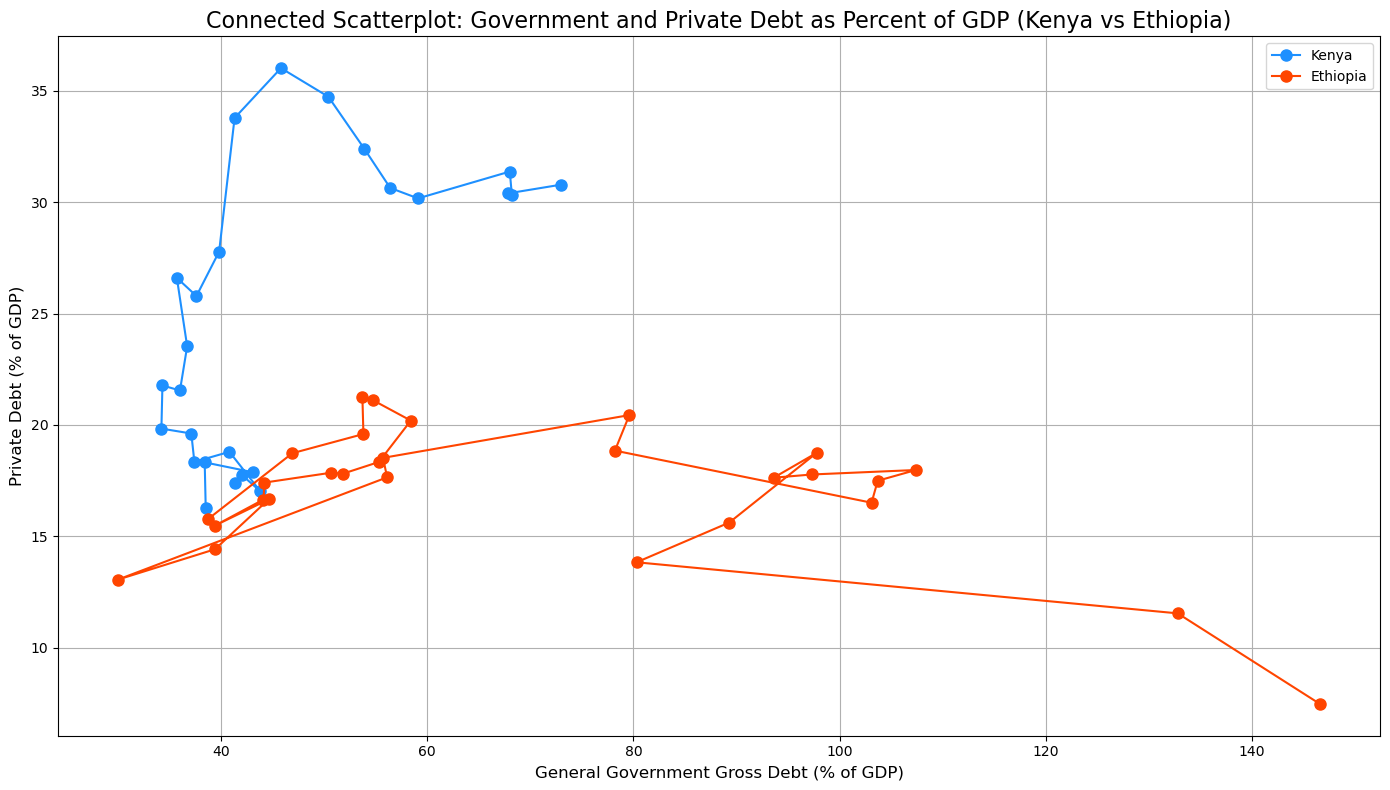

In [22]:
#CONNECTED SCATTERPLOT

gov_debt = 'General government gross debt (Percent of GDP)'
private_debt = 'Private debt, loans and debt securities (Percent of GDP)'

df_merged = pd.merge(df_kenya[[Year, gov_debt, private_debt]],df_ethiopia[[Year, gov_debt, private_debt]],on=Year, suffixes=('_Kenya', '_Ethiopia'))

plt.figure(figsize=(14, 8))
plt.plot(df_merged[gov_debt + '_Kenya'], df_merged[private_debt + '_Kenya'], marker='o', color='dodgerblue', label='Kenya', linestyle='-', markersize=8)
plt.plot(df_merged[gov_debt + '_Ethiopia'], df_merged[private_debt + '_Ethiopia'], marker='o', color='orangered', label='Ethiopia', linestyle='-', markersize=8)

plt.title('Connected Scatterplot: Government and Private Debt as Percent of GDP (Kenya vs Ethiopia)', fontsize=16)
plt.xlabel('General Government Gross Debt (% of GDP)', fontsize=12)
plt.ylabel('Private Debt (% of GDP)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

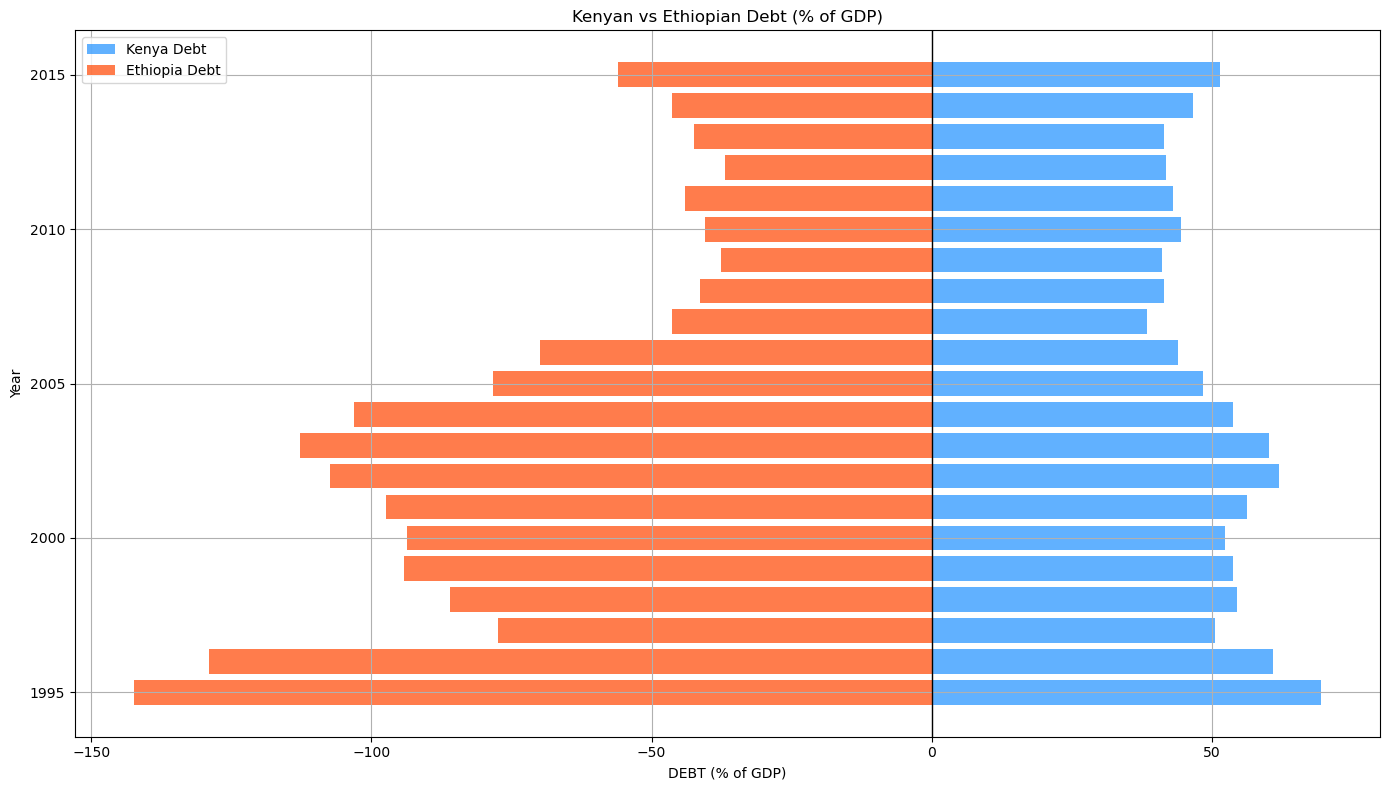

In [52]:
#DIVERGING BAR CHART

debt = 'DEBT (% of GDP)'

df_merged = pd.merge(df_kenya[[Year, debt]], df_ethiopia[[Year, debt]],on=Year, suffixes=('_Kenya', '_Ethiopia'))
df_merged['Debt_Differential_Kenya'] = df_merged[debt + '_Kenya']
df_merged['Debt_Differential_Ethiopia'] = -df_merged[debt + '_Ethiopia']

plt.figure(figsize=(14, 8))
plt.barh(df_merged[Year], df_merged['Debt_Differential_Kenya'], color='dodgerblue', label='Kenya Debt', alpha=0.7)
plt.barh(df_merged[Year], df_merged['Debt_Differential_Ethiopia'], color='orangered', label='Ethiopia Debt', alpha=0.7)
plt.xlabel('DEBT (% of GDP)')
plt.ylabel('Year')
plt.title('Kenyan vs Ethiopian Debt (% of GDP)')
plt.axvline(0, color='black', linewidth=1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [112]:
#HoloViews + Bokeh

import holoviews as hv
import hvplot.pandas  # for the hvplot interface
from bokeh.models import HoverTool
from holoviews import opts

reer = 'Real effective exchange rate'
curr_acc = 'Current account balance\nU.S. dollars (Billions of U.S. dollars)'
ed_index = 'Export Diversification Index (Index)'

df_kenya['Country'] = 'KENYA'
df_ethiopia['Country'] = 'ETHIOPIA'
df = pd.concat([df_kenya[[Year, reer, curr_acc, ed_index, 'Country']],df_ethiopia[[Year, reer, curr_acc, ed_index, 'Country']]])


hv.extension('bokeh')      # Set HoloViews extension to Bokeh
reer_plot = df.hvplot.line(x=Year, y=reer, by='Country', title='Real Effective Exchange Rate Over Time')
cab_plot = df.hvplot.line(x=Year, y=curr_acc, by='Country', title='Current Account Balance Over Time')
edi_plot = df.hvplot.line(x=Year, y=ed_index, by='Country', title='Export Diversification Index Over Time')

hover = HoverTool()
hover.tooltips = [("Year", "@Year"), ("Value", "$y")]
layout = (reer_plot + cab_plot + edi_plot).cols(1)
layout.opts(opts.Curve(width=800, height=300, tools=['hover']),opts.Layout(shared_axes=False))

:Layout
   .NdOverlay.I   :NdOverlay   [Country]
      :Curve   [year]   (Real effective exchange rate)
   .NdOverlay.II  :NdOverlay   [Country]
      :Curve   [year]   (Current account balance
U.S. dollars (Billions of U.S. dollars))
   .NdOverlay.III :NdOverlay   [Country]
      :Curve   [year]   (Export Diversification Index (Index))

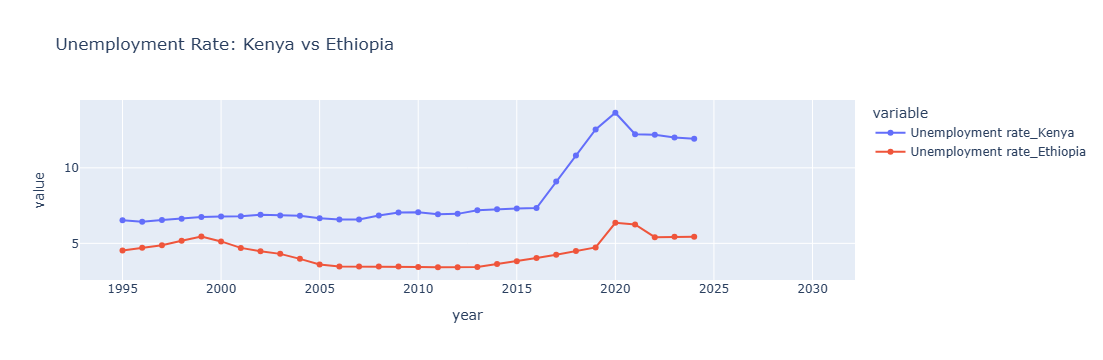

In [110]:
#Plotly

import pandas as pd
import plotly.express as px

unemp = 'Unemployment rate'
df_kenya['Country'] = 'KENYA'
df_ethiopia['Country'] = 'ETHIOPIA'
df_merged = pd.merge(df_kenya[[Year, unemp, 'Country']], df_ethiopia[[Year, unemp, 'Country']], on=Year, suffixes=('_Kenya', '_Ethiopia'))

fig = px.line(df_merged, x='year', y=['Unemployment rate_Kenya', 'Unemployment rate_Ethiopia'], title='Unemployment Rate: Kenya vs Ethiopia',labels={'Year': 'Year','Unemployment rate_Kenya': 'Kenya Unemployment Rate (%)','Unemployment rate_Ethiopia': 'Ethiopia Unemployment Rate (%)'},markers=True)
fig.show()

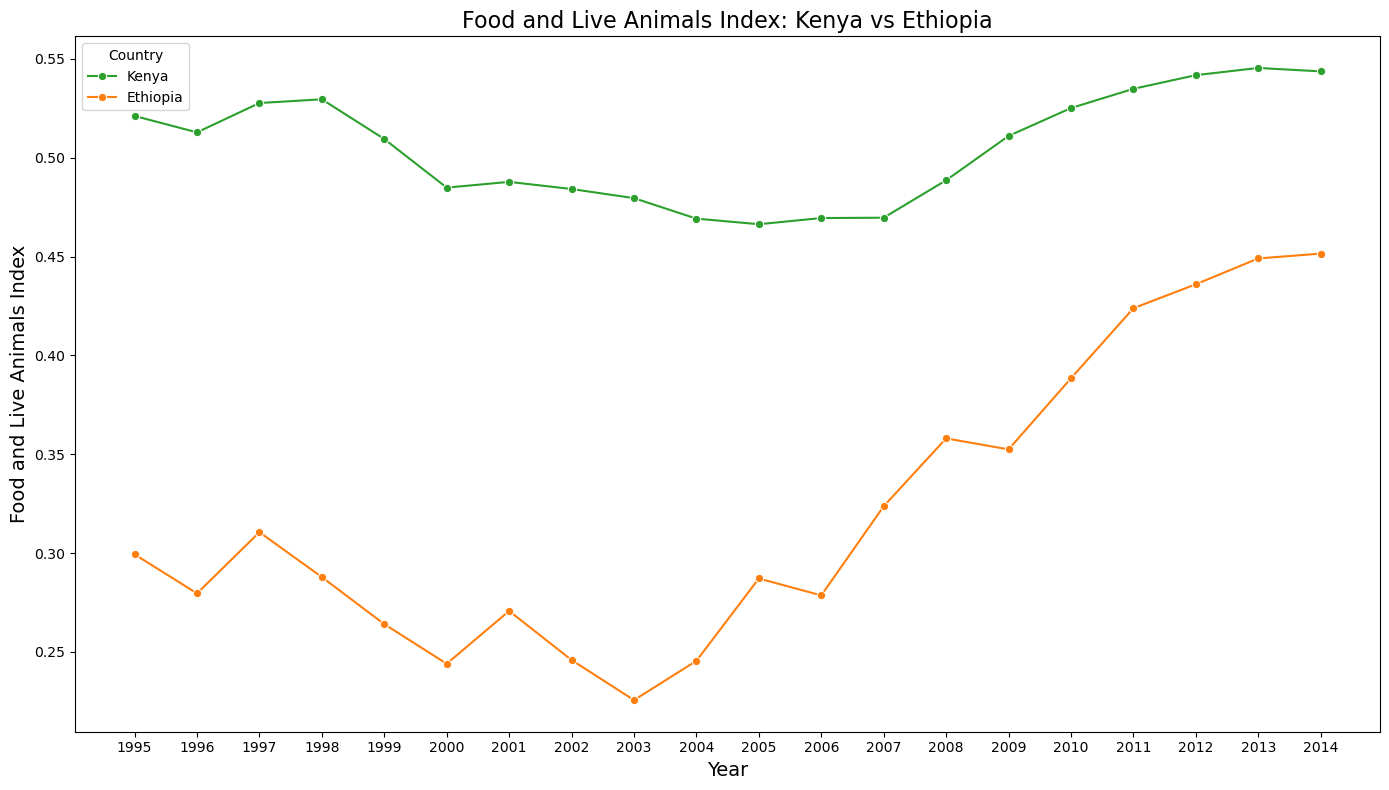

In [108]:
#Matplotlib and Seaborn

food_animal = 'Food and live animals (Index)'

df_kenya_filtered = df_kenya[(df_kenya[Year] >= 1995) & (df_kenya[Year] <= 2014)]
df_ethiopia_filtered = df_ethiopia[(df_ethiopia[Year] >= 1995) & (df_ethiopia[Year] <= 2014)]
df_merged = pd.merge(df_kenya_filtered[[Year, food_animal]],df_ethiopia_filtered [[Year, food_animal]], on=Year, suffixes=('_Kenya', '_Ethiopia'))

plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='Food and live animals (Index)_Kenya', data=df_merged, label='Kenya', marker='o', color='tab:green')
sns.lineplot(x='year', y='Food and live animals (Index)_Ethiopia', data=df_merged, label='Ethiopia', marker='o', color='tab:orange')

plt.title('Food and Live Animals Index: Kenya vs Ethiopia', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.xticks(df_merged[Year], [int(year) for year in df_merged[Year]])
plt.ylabel('Food and Live Animals Index', fontsize=14)
plt.legend(title='Country')
plt.tight_layout()
plt.show()